In [46]:
import numpy as np
import numpy.matlib
import matplotlib.pyplot as plt
import argparse
import os
import cv2
import seaborn as sns
sns.set()
#import tensorflow.compat.v1 as tf
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import pandas as pd
from sklearn import svm, datasets
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix
#DATADIR = "/Users/kayla/Desktop/asl_dataset"
DATADIR = '/Users/kayla/Desktop/asl_dataset'
#CATEGORIES = ["3", "4", "5", "6","7","8","9"]
CATEGORIES = ["a", "b", "c"]

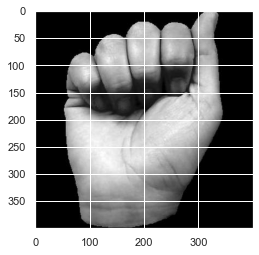

In [47]:
for category in CATEGORIES:
    path = os.path.join(DATADIR, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap="gray")
        plt.show()
        break
    break

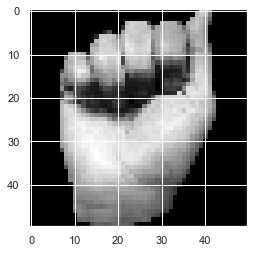

In [48]:
IMG_SIZE = 50

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap = 'gray')
plt.show()

In [49]:
training_data = []
num_img_perclass = []
def create_training_data():
    for category in CATEGORIES:
        count = 0
        path = os.path.join(DATADIR, category)
        class_num = pd.Categorical(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_num])
                count = count + 1
            except Exception as e:
                pass
        num_img_perclass.append(count)    
    return training_data

training_data = create_training_data()

/var/folders/6y/y3n9j25d25927q2cnvvj7xc00000gn/T/ipykernel_1029/400694763.py:7: FutureWarning: Allowing scalars in the Categorical constructor is deprecated and will raise in a future version.  Use `[value]` instead
  class_num = pd.Categorical(category)


210
(50, 50)


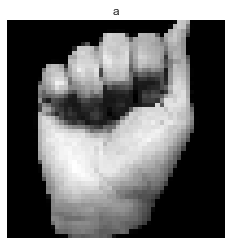

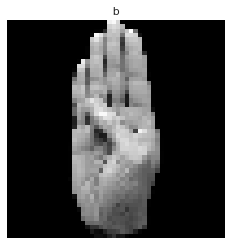

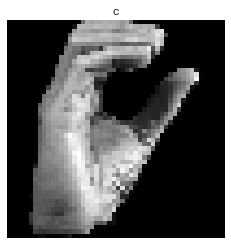

In [50]:
print(len(training_data))
print(training_data[0][0].shape)

#plt.imshow(training_data[93][0], cmap = 'gray')
#plt.show()
label_data = []
num_of_classes = len(num_img_perclass)
for img in range(0,num_of_classes):
    plt.imshow(training_data[num_img_perclass.__getitem__(img)*img][0], cmap = 'gray')
    plt.title(training_data[num_img_perclass.__getitem__(img)*img][1][0])
    plt.axis('off')
    plt.show()
#Convert to categorical#
#y = to_categorical(labels)
#print(y)
#labels

In [51]:
# Creating data for training and testing; taking 80% of data for training per class.
image_train = []
label_train = []
for features, label in training_data:
    image_train.append(features)
    label_train.append(label[0])

data = np.array(image_train).reshape((len(image_train),-1))

X_train, X_validation, y_train, y_validation = train_test_split(data, label_train, test_size=0.2, shuffle=True)

# start_img = 0
# end_img = 0
# end_img = num_img_perclass.__getitem__(0) + end_img -1
# images = training_data[1][0]
# labels = training_data[start_img:end_img][1][0]
# for img in range(0,num_of_classes):
#     end_img = num_img_perclass.__getitem__(img) + end_img
#     X_train, X_validation, y_train, y_validation = train_test_split(training_data[start_img:end_img][0], training_data[start_img:end_img][1][0], 
#                                                                     test_size=0.2, shuffle=True)
#     start_img = start_img + end_img -1

In [52]:
# we create an instance of SVM and fit out data.
C = 1.0 # SVM regularization paramerter
svc = svm.SVC(kernel='linear', C=1, gamma= 'auto').fit(X_train,y_train)

In [53]:
x= data[:,:2] # we ony take the first two features
y = label_train

In [54]:
x_train, X_validation, y_train, y_validation = train_test_split(x,y, test_size=0.8, random_state=42)
svc = svm.SVC(kernel='linear', C=1, gamma= 'auto').fit(x_train,y_train)

In [55]:
classification_results = svc.predict(X_validation)
print(metrics.classification_report(classification_results,y_validation))

              precision    recall  f1-score   support

           a       0.00      0.00      0.00         0
           b       0.00      0.00      0.00         0
           c       1.00      0.33      0.49       168

    accuracy                           0.33       168
   macro avg       0.33      0.11      0.16       168
weighted avg       1.00      0.33      0.49       168



/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Confusion matrix, without normalization
[[ 0  0 58]
 [ 0  0 55]
 [ 0  0 55]]


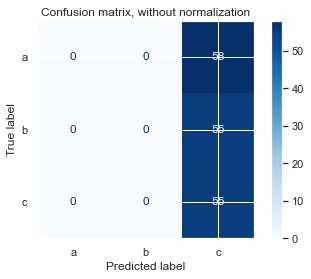

In [56]:
title_options = [("Confusion matrix, without normalization", None)]

for title, normalize in title_options:
    disp = plot_confusion_matrix(svc, X_validation, y_validation, cmap=plt.cm.Blues, normalize=normalize)
    disp.ax_.set_title(title)


    print(title)
    print(disp.confusion_matrix)
plt.show()

In [57]:
# we create an instance of SVM and fit out data.
C = 1.0 # SVM regularization paramerter
svc = svm.SVC(kernel='sigmoid', C=1, gamma= 'auto').fit(X_train,y_train)

ValueError: Found input variables with inconsistent numbers of samples: [168, 42]

In [ ]:
x= data[:,:2] # we ony take the first two features
y = label_train

In [ ]:
x_train, X_validation, y_train, y_validation = train_test_split(x,y, test_size=0.32, random_state=42)
svc = svm.SVC(kernel='sigmoid', C=1, gamma= 'auto').fit(x_train,y_train)

In [ ]:
classification_results = svc.predict(X_validation)
print(metrics.classification_report(classification_results,y_validation))

              precision    recall  f1-score   support

           a       0.00      0.00      0.00         0
           b       0.00      0.00      0.00         0
           c       1.00      0.33      0.49       168

    accuracy                           0.33       168
   macro avg       0.33      0.11      0.16       168
weighted avg       1.00      0.33      0.49       168



/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

Confusion matrix, without normalization
[[ 9  0  0]
 [ 0 14  0]
 [ 0  0 19]]


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


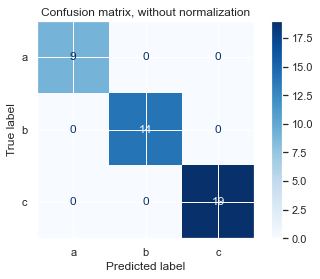

In [ ]:
title_options = [("Confusion matrix, without normalization", None)]

for title, normalize in title_options:
    disp = plot_confusion_matrix(svc, X_validation, y_validation, cmap=plt.cm.Blues, normalize=normalize)
    disp.ax_.set_title(title)


    print(title)
    print(disp.confusion_matrix)
plt.show()

In [63]:
# we create an instance of SVM and fit out data.
C = 1.0 # SVM regularization paramerter
svc = svm.SVC(kernel='rbf', C=1, gamma= 'auto').fit(X_train,y_train)

ValueError: Found input variables with inconsistent numbers of samples: [168, 165]

In [117]:
x_train, X_validation, y_train, y_validation = train_test_split(x,y, test_size=0.46, random_state=42)
svc = svm.SVC(kernel='rbf', C=1, gamma= 'auto').fit(x_train,y_train)

In [118]:
x= data[:,:2] # we ony take the first two features
y = label_train

In [119]:
classification_results = svc.predict(X_validation)
print(metrics.classification_report(classification_results,y_validation))

              precision    recall  f1-score   support

           a       0.00      0.00      0.00         0
           b       0.00      0.00      0.00         0
           c       1.00      0.31      0.47        97

    accuracy                           0.31        97
   macro avg       0.33      0.10      0.16        97
weighted avg       1.00      0.31      0.47        97



/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Confusion matrix, without normalization
[[ 0  0 31]
 [ 0  0 36]
 [ 0  0 30]]


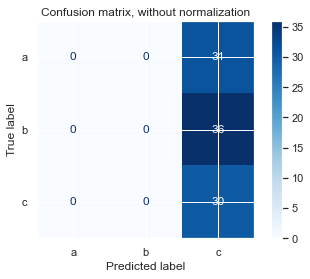

In [120]:
title_options = [("Confusion matrix, without normalization", None)]

for title, normalize in title_options:
    disp = plot_confusion_matrix(svc, X_validation, y_validation, cmap=plt.cm.Blues, normalize=normalize)
    disp.ax_.set_title(title)


    print(title)
    print(disp.confusion_matrix)
plt.show()